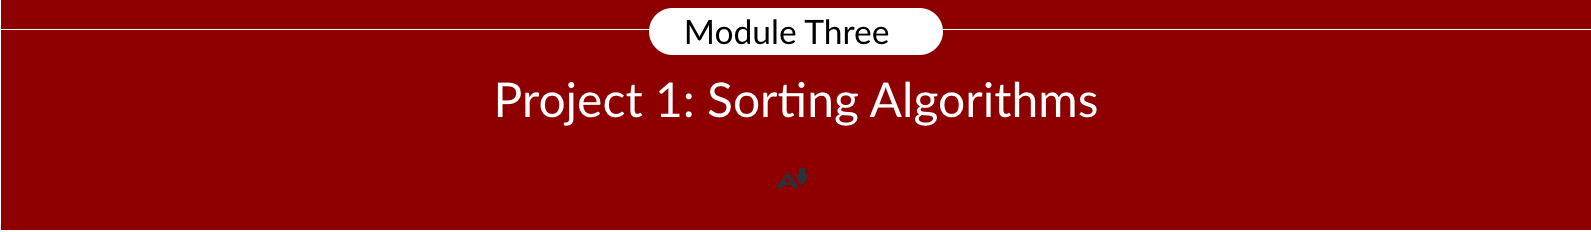

# Objective:
The goal of this project is to enhance your understanding of sorting algorithms and their time complexity in terms of big-O notation. You will implement various sorting algorithms, test their performance, and analyze and present your findings.

# Tasks:
Implement the following sorting algorithms
> Insertion sort    
> Bubble sort     
> Merge sort    
> Quick sort    
> Radix sort    

Performance Testing: After implementing the sorting algorithms, assess their performance using random data sets of 1,000, 10,000, 100,000, and 1,000,000 integers (ranging from 0 to 1,000,000). Ensure that the input data are unsorted and that all algorithms use the identical input file for each input size. Note: If any algorithm takes more than 20 minutes to sort data of size 1,000,000, terminate the program and denote this in your report as "> 20 m".
One way to measure the execution time

>- Start the timer     
start_time = time.time()    
>- Run your algorithm      
sample_algorithm()     
>- Stop the timer     
end_time = time.time()    
>- Calculate the elapsed time     
elapsed_time = end_time - start_time    

For enhanced accuracy, execute each algorithm 5 times for each dataset size. Eliminate the slowest time, and calculate the average of the remaining four results.
(Timing tips: Close all other applications, so you don't have the computer doing too many other things during the timings. Timing only the code you want to time.)


# Submission:
1. Source Code & Readme file which includes how to run your source code. (15 points)
2. A report with your results and conclusions about the experiment. (5 points)

Your report should include:

>A table with the timing data collected    
>A chart or graph visually representing the results   
>A summary and interpretation of your findings.   

In [1]:
# Sort Functions

# Insertion Sort
def insertion_sort(arr):
    # Start from the second element as the first element is considered sorted
    for i in range(1, len(arr)):
        key = arr[i]  # The element to be positioned
        j = i - 1  # Start comparing with the previous element
        # Move elements of arr[0..i-1] that are greater than key
        # to one position ahead of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        # Place the key in its correct position
        arr[j + 1] = key

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # Traverse the array from 0 to n-i-1
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Merge Sort
def merge_sort(arr):
    # Check if the list is more than one element for splitting
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        L = arr[:mid]  # Dividing the array elements into 2 halves
        R = arr[mid:]

        merge_sort(L)  # Sorting the first half
        merge_sort(R)  # Sorting the second half

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort
def quick_sort(arr):
    # Base case: If the list is empty or has one element, it's sorted
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]  # Taking the first element as pivot
        less = [x for x in arr[1:] if x <= pivot]  # Elements less than pivot
        greater = [x for x in arr[1:] if x > pivot]  # Elements greater than pivot
        # Use recursion to sort both parts and concatenate results
        return quick_sort(less) + [pivot] + quick_sort(greater)

# Radix Sort
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n  # Output array
    count = [0] * 10  # Count array

    # Store count of occurrences in count[]
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual position of this digit in output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copy the output array to arr[], so that arr[] now contains sorted numbers according to current digit
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    # Find the maximum number to know the number of digits
    max1 = max(arr)
    exp = 1  # Initialize exponent to 1
    # Count sort for every digit. Note that instead of passing digit number, exp is passed.
    while max1 // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10  # Move to the next digit

In [2]:
import random

# Generates a list of random integers between 0 and 1,000,000
def generate_random_data(size):
    # List comprehension to generate 'size' number of random integers
    return [random.randint(0, 1000000) for _ in range(size)]

In [3]:
import time

# Measures the execution time of a sorting function
def test_sort_performance(sort_function, data):
    # Start the timer 
    start_time = time.time()
    # Run your algorithm
    sort_function(data)
    # Stop the timer
    end_time = time.time()
    # Calculate the elapsed time
    return end_time - start_time

In [ ]:
# List of dataset sizes to test the sorting algorithms with
dataset_sizes = [1000, 10000, 100000, 1000000] # Removed 1,000,000 for quick demonstration

# List of sorting functions to be tested
sort_functions = [insertion_sort, bubble_sort, merge_sort, quick_sort, radix_sort]

# Loop through each dataset size
for size in dataset_sizes:
    # Generate a random dataset of the current size
    data = generate_random_data(size)
    print(f"Testing dataset size: {size}")
    # Loop through each sorting function
    for function in sort_functions:
        # Make a copy of the data for each sort to ensure fairness
        data_copy = data.copy()
        # Measure the execution time of the current sorting function on the dataset
        elapsed_time = test_sort_performance(function, data_copy)
        # Print the name of the sorting function and its execution time
        print(f"{function.__name__}: {elapsed_time:.5f} seconds")
    # Print a separator after testing each dataset size
    print("-" * 40)

Testing dataset size: 1000
insertion_sort: 0.02080 seconds
bubble_sort: 0.04087 seconds
merge_sort: 0.00162 seconds
quick_sort: 0.00096 seconds
radix_sort: 0.00158 seconds
----------------------------------------
Testing dataset size: 10000
insertion_sort: 1.95525 seconds
bubble_sort: 4.10602 seconds
merge_sort: 0.01997 seconds
quick_sort: 0.01129 seconds
radix_sort: 0.01531 seconds
----------------------------------------
Testing dataset size: 100000
